# Linear Regression

## Advantages
- Simple, highly explainable regression model.
- Regression baseline model.
- Produces interpretable coefficients and intercept.

## Disadvantages
- Low performance compared to modern machine learning models.
- Relationship between features and target must be linear.
- Influenced by covariance.

## References
1. Hands-On Machine Learning, Chapter 4
1. Machine Learning Pocket Reference, Chapter 11, Chapter 14
1. All of Statistics, Chapter 13
1. An Introduction to Statistical Learning, Chapter 3
1. Linear Regression on Boston Housing Dataset: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

## The Model

Linear regression is a *supervised learning* model that makes a prediction by computing a weighted sum of the input features, plus an intercept term (also called the bias term). This finds a linear relationship between feature(s) and target where the error between predictors and ground truth is minimized.

The basic form of linear regression is:

$$
    \hat{y} = \theta_0 + \sum_{i=1}^{n}\theta_nx_n
$$

The vectorized form:

$$
    \hat{y} = h_\theta(x) = \theta \cdot x
$$

### Cost Function

We need to find the minimum value of the mean squared error (least squares regression):

$$
    MSE(X, h_\theta) = \frac{}{}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2
$$

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function (closed-form solution):

$$
    \hat{\theta} = (X^TX)^{-1} X^t y
$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_boston()

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(data['data'], columns=data['feature_names'])

In [6]:
boston = pd.concat([boston, pd.Series(data['target'], name='MEDV')], axis=1)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


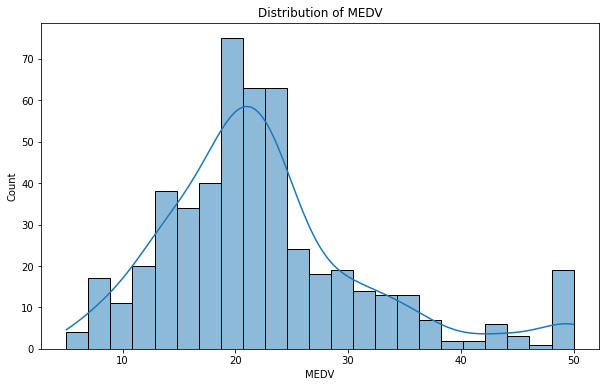

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(boston['MEDV'], kde=True)
ax.set_title('Distribution of MEDV')
plt.show()

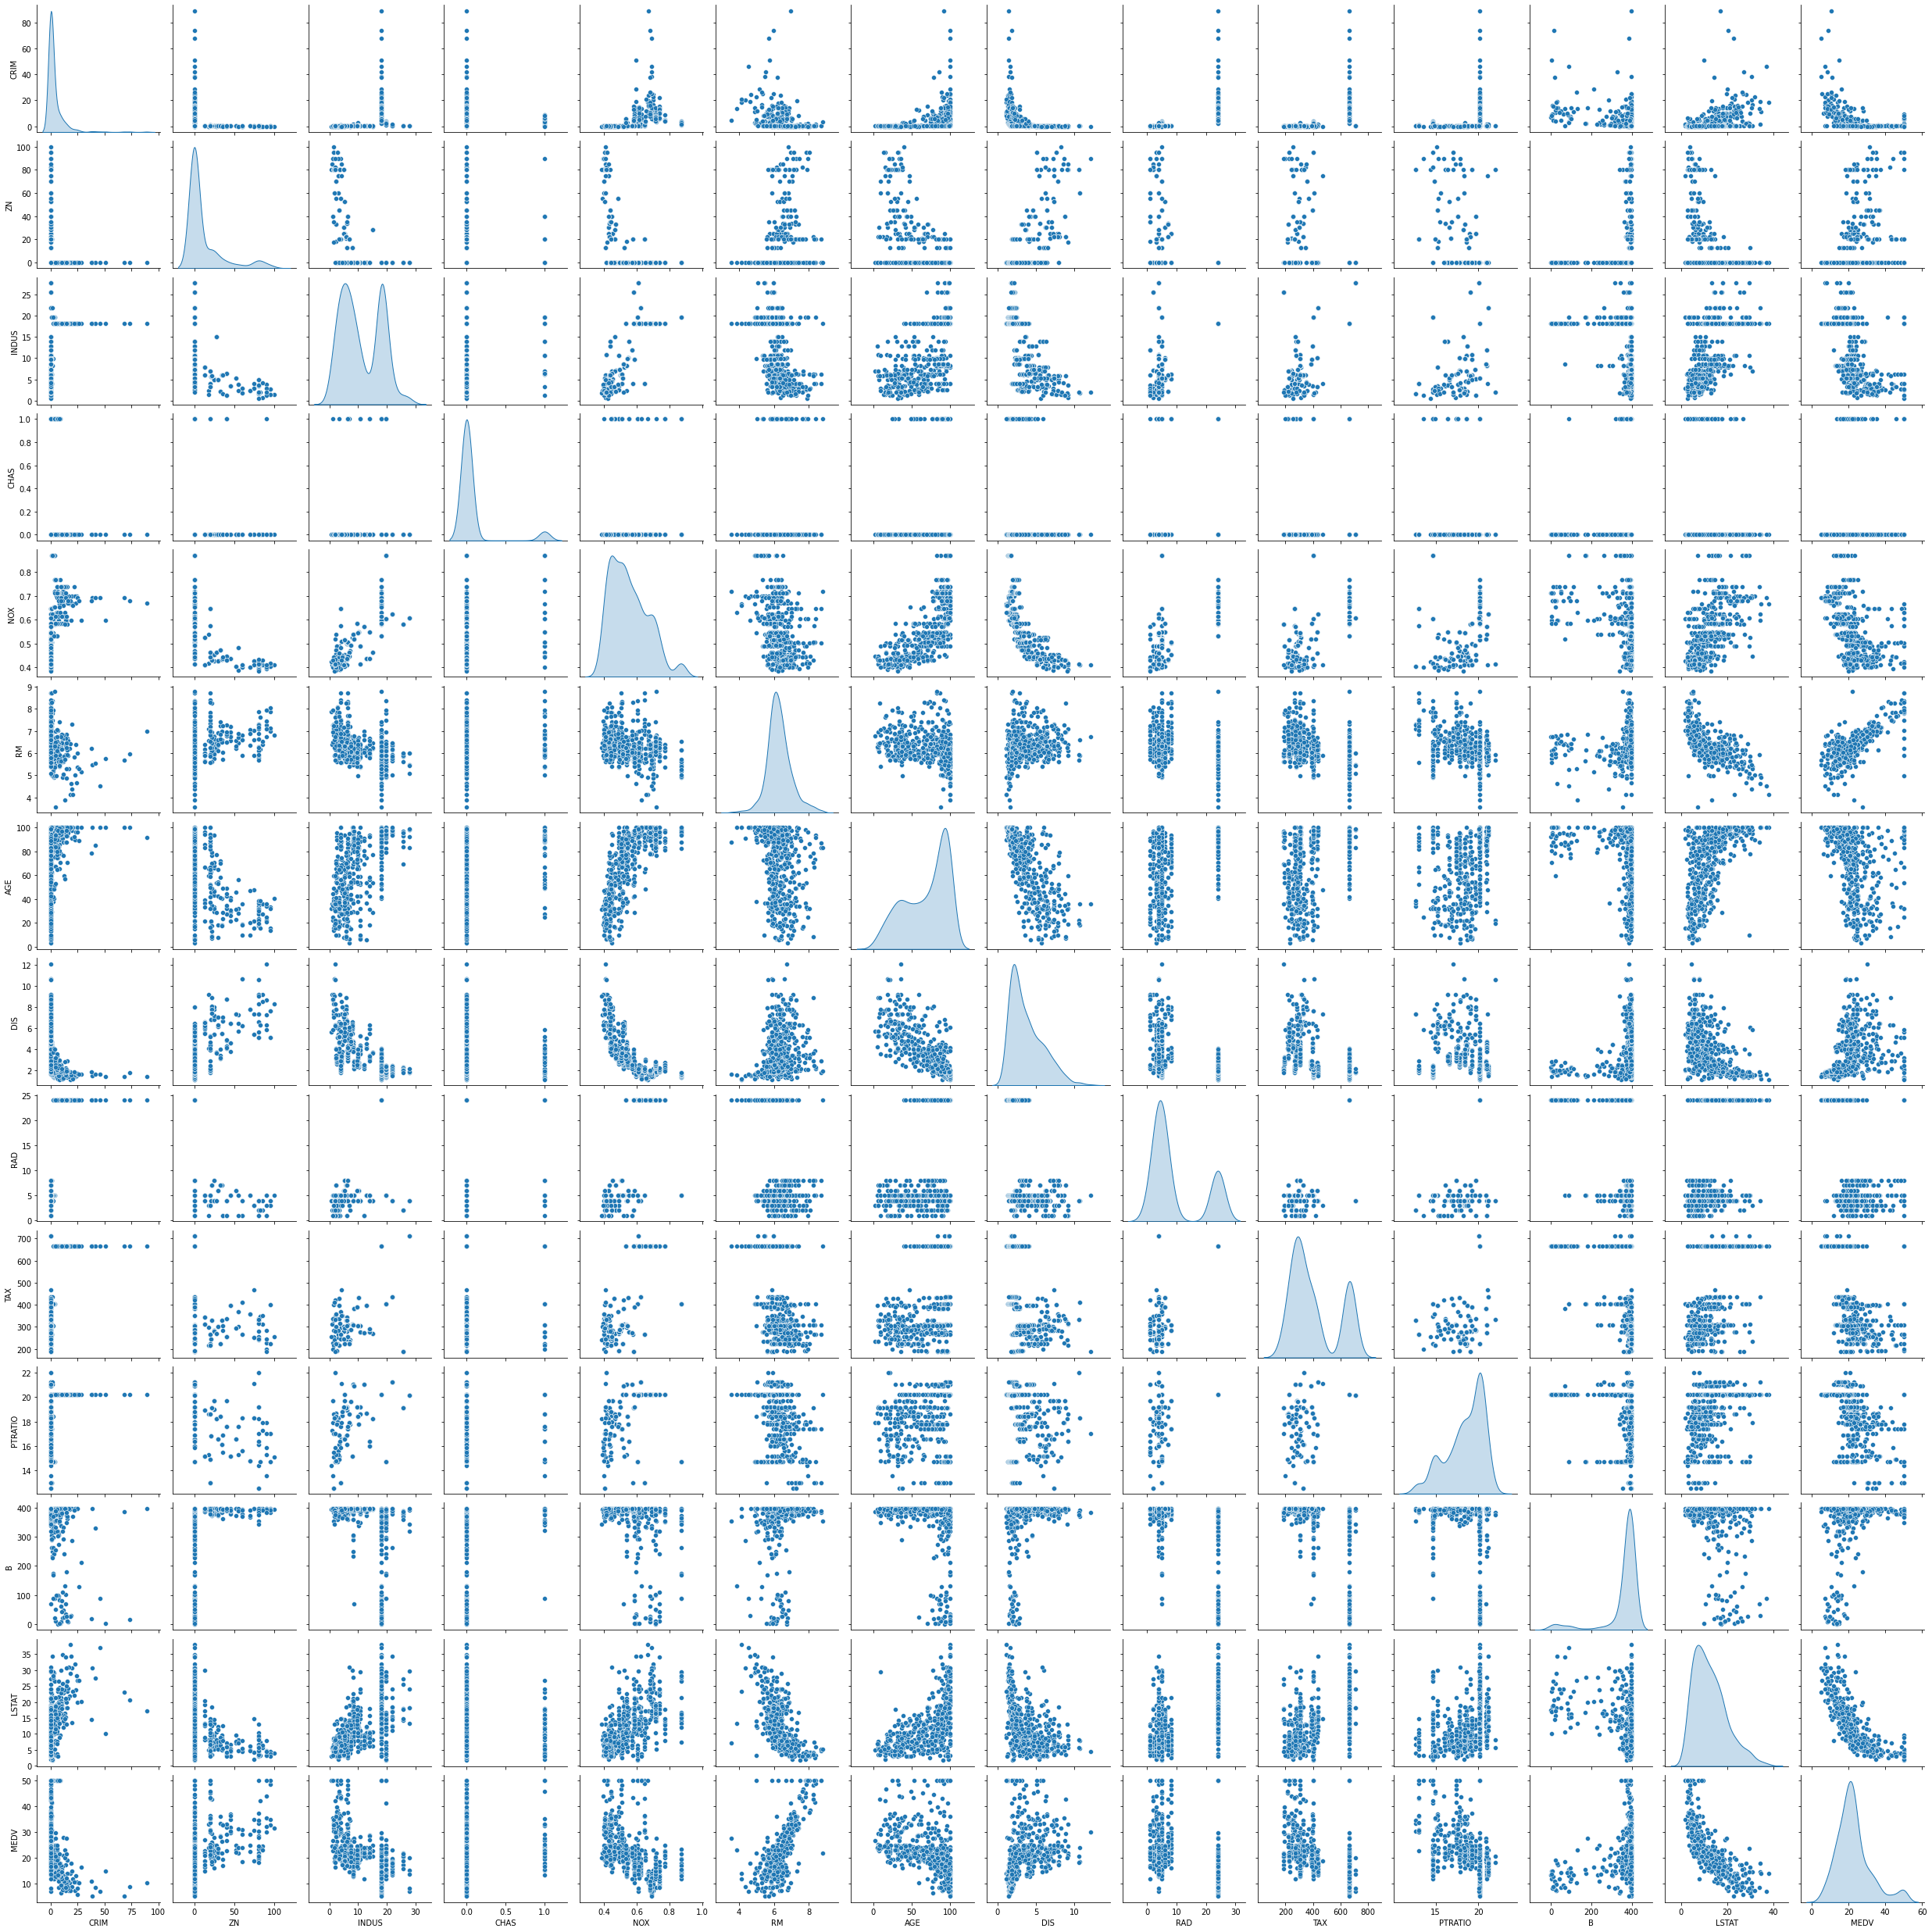

In [11]:
_ = sns.pairplot(boston, diag_kind='kde')

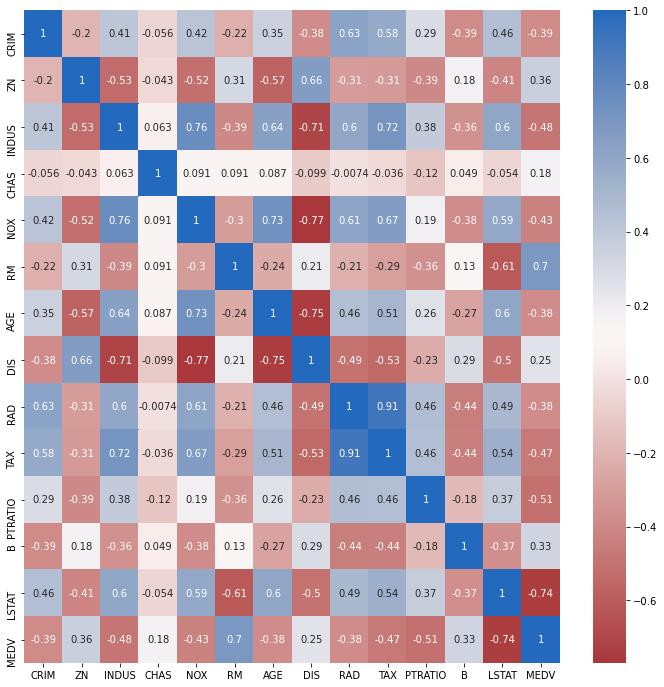

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(boston.corr(), cmap='vlag_r', annot=True)
plt.show()

## Data Preparation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## A Basic Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lm.predict(X_test)

### Model Parameters

In [18]:
coefficients = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficients'])
coefficients

,Coefficients
CRIM,-0.119443
ZN,0.044780
INDUS,0.005485
CHAS,2.340804
NOX,-16.123604
RM,3.708709
AGE,-0.003121
DIS,-1.386397
RAD,0.244178
TAX,-0.010990


In [19]:
intercept = pd.DataFrame({'Intercept': lm.intercept_}, index=['BIAS'])
intercept

,Intercept
BIAS,38.091695


### Evaluation

In [20]:
import sklearn.metrics as met
from scipy import stats
import statsmodels.stats.api as sms

*Mean absolute error*, *mean squared error*, and *root mean squared error* are measures of model error.

In [21]:
mae = met.mean_absolute_error(y_test, y_pred)
mse = met.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Square Error: {mse:.2f}')
print(f'Root Mean Square Error: {rmse:.2f}')

Mean Absolute Error: 3.84
Mean Square Error: 33.45
Root Mean Square Error: 5.78


The *coefficient of determination (R2)* represents the percent of the variance of the target that is explained by the features.

In [22]:
r2 = met.r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')

R2 Score: 0.59


Linear model performance can be evaluated on *homoscedasticity*, meaning that the variance is the same for all values of targets regardless of features. If residual values are normally distributed, then the model is homoscedastistic.

In [23]:
resid = y_pred - y_test

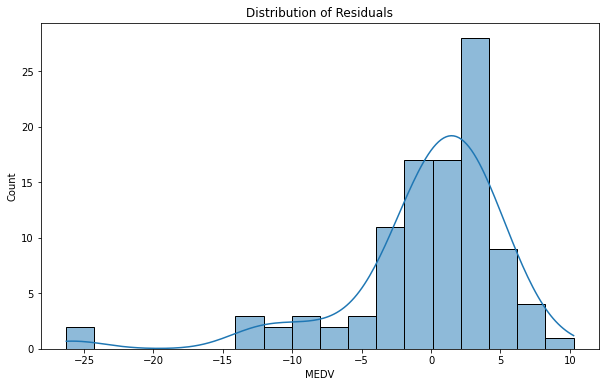

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(resid, kde=True)
ax.set_title('Distribution of Residuals')
plt.show()

The *Kolmogorov-Smirnov test* can evaluate if a distirbution is normal. If $p$ is significant (<0.05) then the values are not normal.

In [25]:
stats.kstest(resid, cdf='norm')

KstestResult(statistic=0.40279615385495626, pvalue=1.861521761020188e-15)

In the *Breusch-Pagan test*, if the p-values are significant (<0.05), the null hypothesis of homoscedasticity is rejected. This indicates that residuals are heteroscedastic, and the predictions are biased.

In [26]:
hb = sms.het_breuschpagan(resid, X_test)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, num in zip(labels, hb):
    print(f'{name}: {num:.2f}')

Lagrange multiplier statistic: 31.93
p-value: 0.00
f-value: 3.12
f p-value: 0.00


A *Q-Q probability plot* can show the points at which homoscedasticity fails.

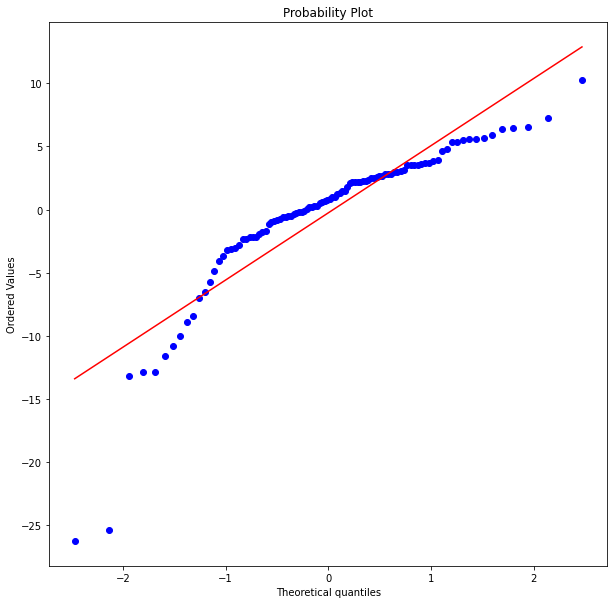

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(resid, plot=ax)
plt.show()

In [28]:
import yellowbrick.regressor as ybr

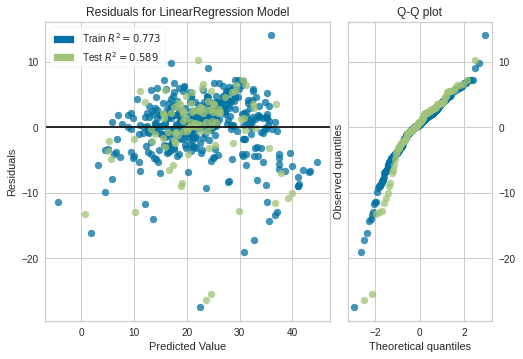

In [29]:
viz = ybr.ResidualsPlot(lm, hist=False, qqplot=True, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

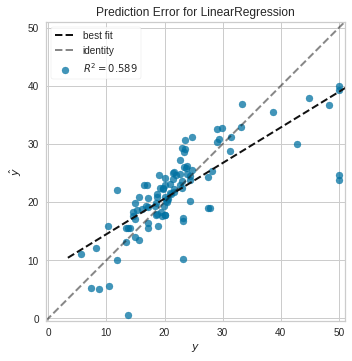

In [30]:
viz = ybr.PredictionError(lm, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

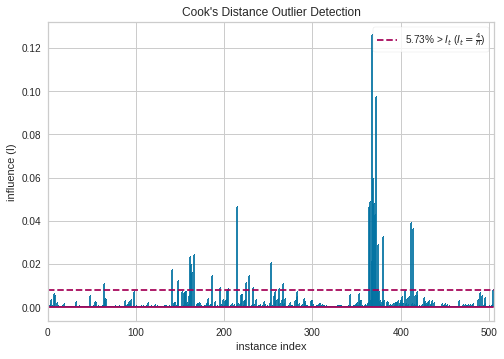

In [31]:
viz = ybr.CooksDistance()
viz.fit(X, y)
viz.show()
plt.show()

## Regularization

In [32]:
def plot_coefs(coefs, alphas, mse, title, ylim=None):
    fig, ax = plt.subplots(2, 1, figsize=(12, 12))
    for i in range(coefs.shape[1]):
        ax[0].plot(alphas, coefs[:,i])
    ax[0].axhline(0.0, color='k', linestyle='--', linewidth=0.5)
    ax[0].set_ylabel('Partial slope values')
    ax[0].set_xlabel('alpha')
    print(ylim)
    if ylim is not None: 
        ax[0].set_ylim(ylim)
    ax[0].legend(X_train.columns, bbox_to_anchor=(1, 1))
    
    ax[1].plot(alphas, mse)
    ax[1].set_ylabel('MSE')
    ax[0].set_xlabel('alpha')
    ax[0].set_title(title)

### Lasso Regression (L1 Regularization)

**L**east **A**bsolute **S**hrinkage and **S**election **O**perator.

Lasso regression adds a regularization to the cost function using the $\ell_1$.

$$
    j(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|
$$

In [33]:
from sklearn.linear_model import Lasso

In [34]:
def lasso_regularization(X_train, X_test, y_train, y_test, alphas):
    n_coefs = len(X_train.columns)
    coefs = np.zeros((len(alphas), n_coefs))
    mse = []

    for i, alpha in enumerate(alphas):
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        coefs[i,:] = lasso.coef_
        y_pred = lasso.predict(X_test)
        mse.append(met.mean_squared_error(y_test, y_pred))
    return coefs, mse

In [35]:
alphas = np.arange(0.01, 20.0, step=0.1)
coefs, mse = lasso_regularization(X_train, X_test, y_train, y_test, alphas)

(-0.25, 0.3)


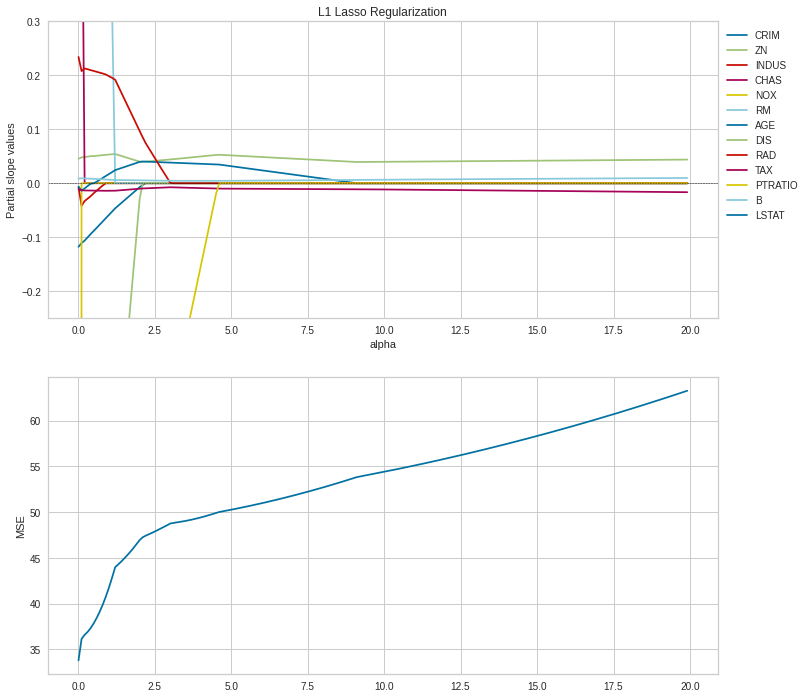

In [36]:
plot_coefs(coefs, alphas, mse, 'L1 Lasso Regularization', ylim=(-0.25,0.3))

### Evaluation

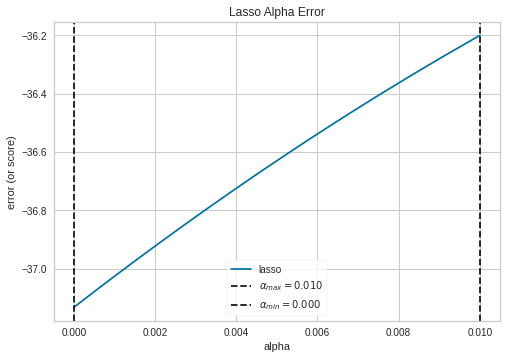

In [37]:
lasso = Lasso()
viz = ybr.ManualAlphaSelection(lasso, alpha=alphas, cv=5, scoring='neg_mean_squared_error')
viz.fit(X, y)
viz.show()
plt.show()

## Ridge Regression (L2 Regularization)

Ridge regression (also known as *Tiknonov regularization*) fits to the data while keeping the model weights as small as possible. This represents the $\ell_2$ form.

$$
    j(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

Note that the bias term $\theta_0$ is not regularized

In [38]:
from sklearn.linear_model import Ridge

In [39]:
def ridge_regularization(X_train, X_test, y_train, y_test, alphas):
    n_coefs = len(X_train.columns)
    coefs = np.zeros((len(alphas), n_coefs))
    mse = []

    for i, alpha in enumerate(alphas):
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        coefs[i,:] = ridge.coef_
        y_pred = ridge.predict(X_test)
        mse.append(met.mean_squared_error(y_test, y_pred))
    return coefs, mse

In [40]:
alphas = np.arange(0.01, 40.0, step=0.1)
coefs, mse = ridge_regularization(X_train, X_test, y_train, y_test, alphas)

(-2.0, 2.0)


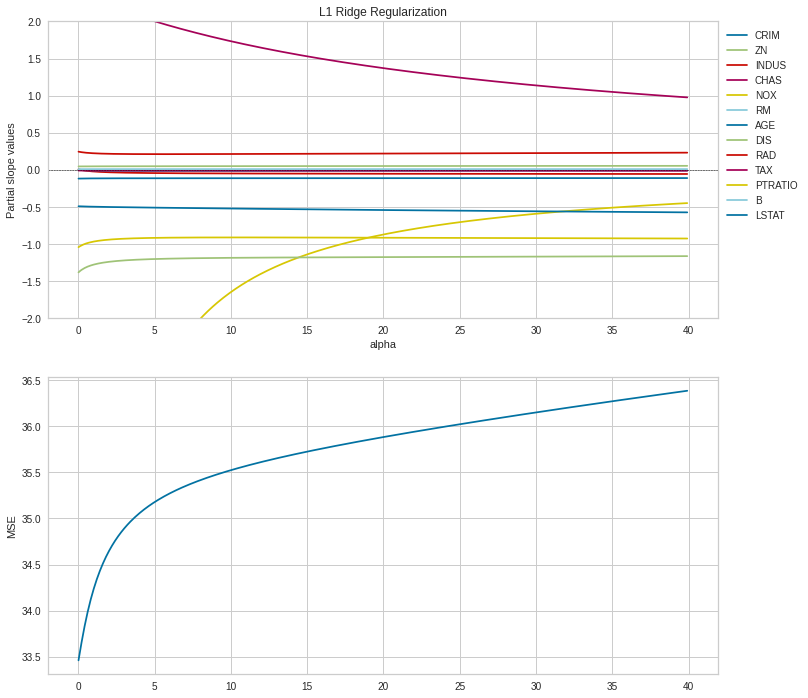

In [41]:
plot_coefs(coefs, alphas, mse, 'L1 Ridge Regularization', ylim=(-2.0,2.0))

### Evaluation

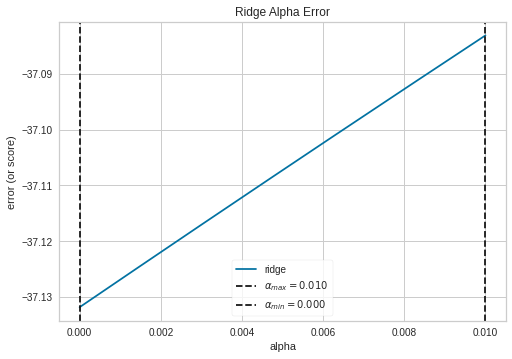

In [42]:
ridge = Ridge()
viz = ybr.ManualAlphaSelection(ridge, alpha=alphas, cv=5, scoring='neg_mean_squared_error')
viz.fit(X, y)
viz.show()
plt.show()

## Elastic Net (Lasso + Ridge)

Mix of both $\ell_1$ and $\ell_2$ regularization.

$$
    j(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2
$$

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
def elastic_regularization(X_train, X_test, y_train, y_test, alphas):
    n_coefs = len(X_train.columns)
    coefs = np.zeros((len(alphas), n_coefs))
    mse = []

    for i, alpha in enumerate(alphas):
        elastic = ElasticNet(alpha=alpha)
        elastic.fit(X_train, y_train)
        coefs[i,:] = elastic.coef_
        y_pred = elastic.predict(X_test)
        mse.append(met.mean_squared_error(y_test, y_pred))
    return coefs, mse

In [45]:
alphas = np.arange(0.01, 40.0, step=0.1)
coefs, mse = elastic_regularization(X_train, X_test, y_train, y_test, alphas)

(-0.5, 0.5)


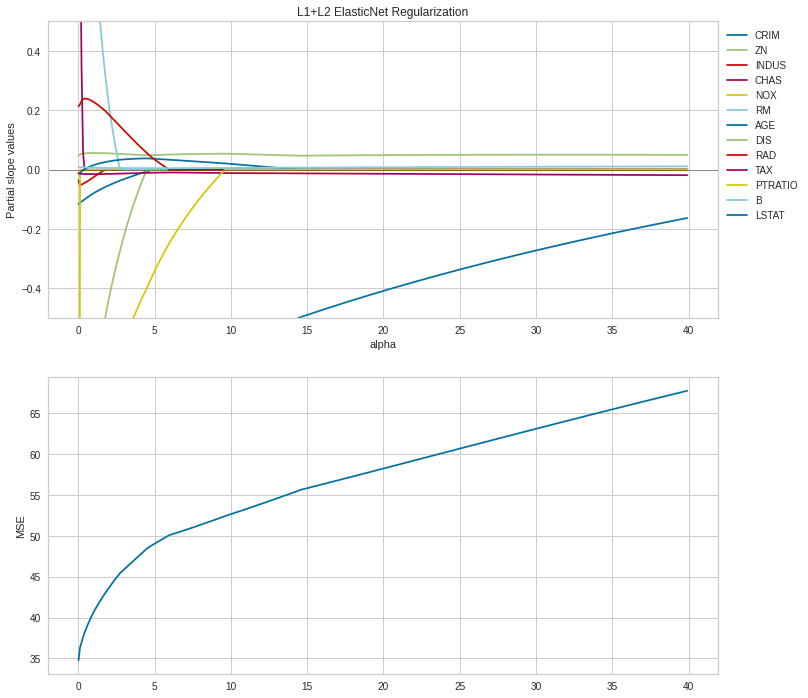

In [46]:
plot_coefs(coefs, alphas, mse, 'L1+L2 ElasticNet Regularization', ylim=(-0.5,0.5))

### Evaluation

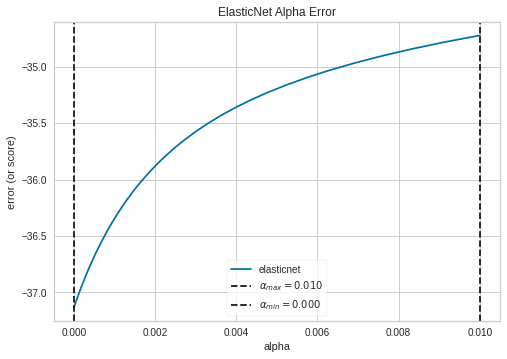

In [47]:
elastic = ElasticNet()
viz = ybr.ManualAlphaSelection(elastic, alpha=alphas, cv=5, scoring='neg_mean_squared_error')
viz.fit(X, y)
viz.show()
plt.show()